<a href="https://colab.research.google.com/github/vaishnavipatil29/Career-Guidance-ML-Project/blob/master/FinalPRMLcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Career Guidance System**

In [141]:
#importing data
import numpy as np
import pandas as pd

url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'
dataset = pd.read_csv(url)
print(np.shape(dataset))
dataset.head()

(7525, 26)


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,design_skill,first_computer,first_program,lab_programs,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,2,2,2,3,4,1,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,3,3,1,3,4,2,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,2,3,2,2,2,1,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,2,2,2,3,4,2,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,2,3,2,4,4,2,1,2,1,3,1,5,4,3,1,Data Analyst


In [175]:
data = dataset.iloc[:49,:-1].values
label = dataset.iloc[:49,-1]
#-------------------------------Label Encoding--------------------------#
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df = dataset
label = df.iloc[:49,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["ROLE"])
numeric=y["ROLE"].unique() 
y1 = pd.DataFrame({'ROLE':original, 'Associated Number':numeric})
print(y1)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label)
y=pd.DataFrame(label,columns=["role"])
X = pd.DataFrame(data,columns=['sslc','hsc','cgpa','school_type','no_of_miniprojects','no_of_projects',
                                'coresub_skill','aptitude_skill','problemsolving_skill','programming_skill','abstractthink_skill',
                                'design_skill','first_computer','first_program','lab_programs','ds_coding','technology_used',
                                'sympos_attend','sympos_won','extracurricular','learning_style','college_bench','clg_teachers_know','college_performence','college_skills'])

                 ROLE  Associated Number
0   Technical Support                  4
1  Software Developer                  2
2      UI/UX Designer                  6
3        Data Analyst                  1
4    Technical Writer                  5
5       Web Developer                  7
6     Software Tester                  3
7    Business Analyst                  0


Thus, we have categorical data and categorical target.

For  Feature Selection : 

We propose to use: 

1. Chi-Squared Statistic.
2. Mutual Information Statistic.



In [143]:

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 0.056432
Feature 1: 0.026606
Feature 2: 0.264380
Feature 3: 0.381868
Feature 4: 1.256479
Feature 5: 1.807401
Feature 6: 1.264217
Feature 7: 0.566296
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.676191
Feature 11: 0.898628
Feature 12: 1.021494
Feature 13: 0.000000
Feature 14: 1.712591
Feature 15: 0.273604
Feature 16: 2.650362
Feature 17: 0.150529
Feature 18: 0.279142
Feature 19: 0.146479
Feature 20: 0.246907
Feature 21: 0.181558
Feature 22: 0.243139
Feature 23: 0.814039
Feature 24: 0.079684


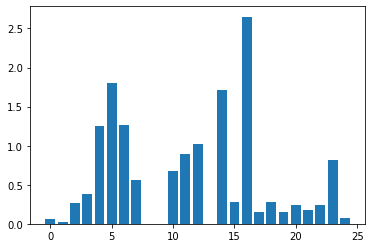

 The number of important features with threshold as 1 :6 
Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


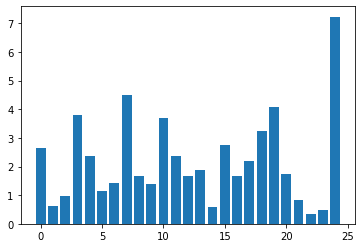

 The number of important features with threshold as 1 :19 


In [144]:
# feature selection
# example of chi squared feature selection for categorical data
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

count = 0
for i in fs.scores_ : 
    if i > 1 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 1 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 1 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 1 :{} ".format(k3))

Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


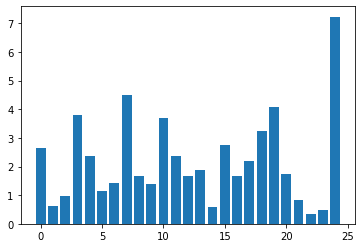

 The number of important features with threshold as 1 : 19


In [145]:
#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 1 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 1 : {}" .format(k5))

A bar chart of the feature importance scores for each input feature is created.



So, from above plot we remove the features with lower importance scores (<1.5).

Hence features 2,5,8,9,14,16,21,22,23 are not considered,

We could set k=16 i.e (25-9)  When configuring the SelectKBest to select these top 16 features

In [149]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)

 
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

#-------------XGBoost-----------------#
print("Boosting the Decision Tree  ")
acc = xgboost(X_train2,y_train2,X_test2,y_test2,clf)


Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 40.0
With feature Selection : 
Model accuracy score with Decision Tree 40.0
 
Boosting the Decision Tree  
accuracy= 93.33333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mutual Info Classification

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 1.939425
Feature 1: 0.621032
Feature 2: 1.190205
Feature 3: 2.361067
Feature 4: 2.723434
Feature 5: 1.019886
Feature 6: 1.630621
Feature 7: 5.962755
Feature 8: 0.948673
Feature 9: 1.391667
Feature 10: 3.995109
Feature 11: 3.001412
Feature 12: 1.301361
Feature 13: 1.730517
Feature 14: 0.916034
Feature 15: 2.627847
Feature 16: 0.703328
Feature 17: 2.405423
Feature 18: 3.379566
Feature 19: 3.567291
Feature 20: 2.512279
Feature 21: 1.074299
Feature 22: 0.271954
Feature 23: 0.452889
Feature 24: 8.890845


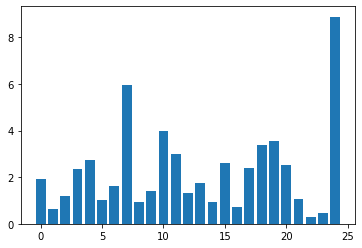

 The number of important features with threshold as 0.2 :25 
Feature 0: 0.206512
Feature 1: 0.000000
Feature 2: 0.030565
Feature 3: 0.000000
Feature 4: 1.123318
Feature 5: 1.615520
Feature 6: 0.763666
Feature 7: 0.226821
Feature 8: 0.021102
Feature 9: 0.000000
Feature 10: 0.605446
Feature 11: 0.231260
Feature 12: 1.023677
Feature 13: 0.055574
Feature 14: 2.088958
Feature 15: 0.304069
Feature 16: 1.360764
Feature 17: 0.000000
Feature 18: 0.297629
Feature 19: 0.143156
Feature 20: 0.305350
Feature 21: 0.058968
Feature 22: 0.230731
Feature 23: 0.455775
Feature 24: 0.175940


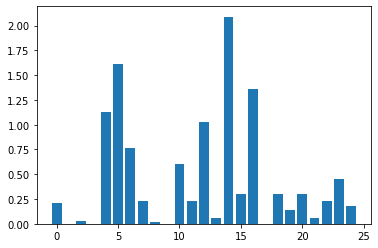

 The number of important features with threshold as 0.2 :15 
Feature 0: 0.143944
Feature 1: 0.000000
Feature 2: 0.102765
Feature 3: 0.000000
Feature 4: 0.600839
Feature 5: 0.759564
Feature 6: 0.593741
Feature 7: 0.182509
Feature 8: 0.276503
Feature 9: 0.000000
Feature 10: 0.173822
Feature 11: 0.328662
Feature 12: 0.483945
Feature 13: 0.066697
Feature 14: 1.777437
Feature 15: 0.209989
Feature 16: 1.585256
Feature 17: 0.333728
Feature 18: 0.291603
Feature 19: 0.127384
Feature 20: 0.202855
Feature 21: 0.144670
Feature 22: 0.202034
Feature 23: 0.443774
Feature 24: 0.208607


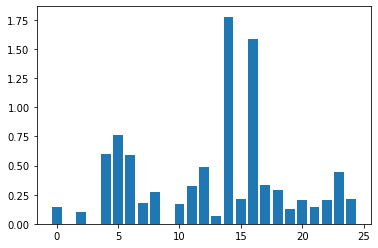

 The number of important features with threshold as 0.2 : 15


In [147]:
# example of mutual information feature selection for categorical data
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

count = 0
for i in fs.scores_ : 
    if i > 0.2 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 0.2 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 0.2 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 0.2 :{} ".format(k3))

#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 0.2 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 0.2 : {}" .format(k5))

In [150]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)

 
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

#-------------XGBoost-----------------#
print("Boosting the Decision Tree  ")
acc = xgboost(X_train2,y_train2,X_test2,y_test2,clf)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 40.0
With feature Selection : 
Model accuracy score with Decision Tree 50.0
 
Boosting the Decision Tree  
accuracy= 93.33333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Accuracies vs Techniques

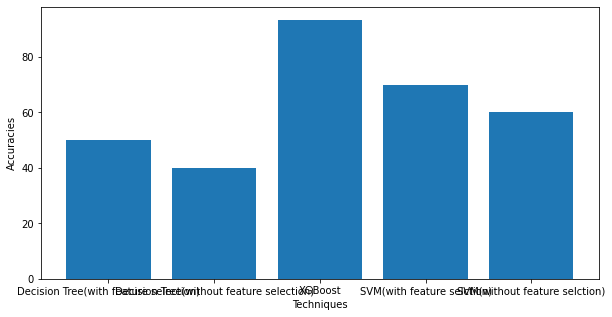

In [172]:
import matplotlib.pyplot as plt
#fig = plt.figure()
fig = plt.figure(figsize =(10, 5)) 
#ax = fig.add_axes([0,0,1,1])
Name = ['Decision Tree(with feature selection)','Decision Tree(without feature selection)', 'XGBoost', 'SVM(with feature selction)','SVM(without feature selction)']
accuracies = [50,40,93.333,70,60]
plt.bar(Name,accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Techniques')
plt.show()

Prediction for new input

In [170]:
# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(X.columns) 
for i in feat:
  print(i)
  val = input("Enter: ") 
  x_new.append(val)
x_new

sslc
Enter: 3
hsc
Enter: 5
cgpa
Enter: 4
school_type
Enter: 3
no_of_miniprojects
Enter: 5
no_of_projects
Enter: 4
coresub_skill
Enter: 3
aptitude_skill
Enter: 5
problemsolving_skill
Enter: 2
programming_skill
Enter: 2
abstractthink_skill
Enter: 5
design_skill
Enter: 2
first_computer
Enter: 5
first_program
Enter: 4
lab_programs
Enter: 2
ds_coding
Enter: 5
technology_used
Enter: 5
sympos_attend
Enter: 3
sympos_won
Enter: 2
extracurricular
Enter: 5
learning_style
Enter: 5
college_bench
Enter: 4
clg_teachers_know
Enter: 2
college_performence
Enter: 3
college_skills
Enter: 4


['3',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '5',
 '2',
 '2',
 '5',
 '2',
 '5',
 '4',
 '2',
 '5',
 '5',
 '3',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4']

In [182]:
#x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
new_pred  = clf.predict([x_new])
print("Prediction : {}".format(y1[y1['Associated Number']==new_pred[0]]['ROLE']))

Prediction : 4    Technical Writer
Name: ROLE, dtype: object


Algorithms : SVM, Decision Tree and XGBoost

In [ ]:
#Support Vector machine
from sklearn.metrics import confusion_matrix,accuracy_score
def svm(X_train,y_train,X_test,y_test):
  from sklearn.svm import SVC
  from pandas import read_csv
  from sklearn.model_selection import train_test_split

  # import metrics to compute accuracy
  from sklearn.metrics import accuracy_score
  svc=SVC() 
  # fit classifier to training set
  svc.fit(X_train,y_train)
  # make predictions on test set
  y_pred=svc.predict(X_test)
  # compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
  return accuracy_score(y_test, y_pred)*100

def Dec_tree(X_train,y_train,X_test,y_test):
  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  # Prediction
  y_pred = clf.predict(X_test)
  y_test_arr=y_test['role']
  from sklearn.metrics import confusion_matrix,accuracy_score
  accuracy = accuracy_score(y_test,y_pred)
  print('Model accuracy score with Decision Tree', accuracy_score(y_test, y_pred)*100)
  return accuracy*100,clf

def xgboost(X_train,y_train,X_test,y_test,clf):
  #X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10)
  shape = X_train.shape
  X_train=pd.to_numeric(X_train.values.flatten())
  X_train=X_train.reshape(shape)
  from xgboost.sklearn import XGBClassifier
  model = XGBClassifier()
  model.fit(X_train, y_train)
  xgb_y_pred  = clf.predict(X_test)
  xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
  print("accuracy=",xgb_accuracy*100)
  return xgb_accuracy*100